In [1]:
import tensorflow as tf
import keras 
import pandas as pd
import numpy as np
import seaborn as sns
import random as ran
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [3]:
# Pulling Cifar10 Datasets and splitting the data (80/20)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [4]:
# Labels for cats and dogs in the Cifer10 datasets
cats_label = 3
dogs_label = 5

# Filter the training data for cats and dogs
train_filter = (train_labels.squeeze() == cats_label) | (train_labels.squeeze() == dogs_label)
x_train = train_images[train_filter]
y_train = train_labels[train_filter]

# Filter the testing data for cats and dogs
test_filter = (test_labels.squeeze() == cats_label) | (test_labels.squeeze() == dogs_label)
x_test = test_images[test_filter]
y_test = test_labels[test_filter]

In [5]:
x_train[10]

array([[[213, 221, 221],
        [119, 127, 122],
        [ 58,  71,  81],
        ...,
        [143, 158, 150],
        [140, 142, 136],
        [117, 101,  87]],

       [[214, 223, 220],
        [128, 137, 130],
        [ 62,  75,  83],
        ...,
        [138, 152, 145],
        [136, 138, 133],
        [111,  95,  82]],

       [[215, 224, 219],
        [139, 148, 139],
        [ 75,  88,  94],
        ...,
        [136, 151, 143],
        [134, 136, 131],
        [107,  91,  77]],

       ...,

       [[118,  45,  37],
        [122,  45,  40],
        [129,  46,  42],
        ...,
        [158,  65,  54],
        [151,  68,  55],
        [145,  67,  55]],

       [[111,  38,  32],
        [117,  42,  36],
        [128,  47,  41],
        ...,
        [153,  62,  53],
        [147,  59,  49],
        [141,  63,  51]],

       [[110,  38,  32],
        [116,  40,  34],
        [127,  48,  41],
        ...,
        [141,  55,  46],
        [136,  52,  43],
        [139,  58,  47]]

In [6]:
np.isnan(x_train).sum()

0

In [7]:
np.isnan(x_test).any()

False

In [8]:
x_train.shape

(10000, 32, 32, 3)

In [9]:
x_train = x_train / 255.0

In [10]:
x_test = x_test / 255.0

C:\Users\puixd\AppData\Local\Temp\ipykernel_25108\2732940846.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('Example: %d  Label: %d' % (num, label))


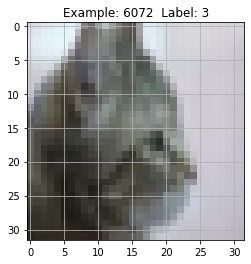

In [11]:
def display_digit(num, size, color):
    image = x_train[num].reshape([size,size,color])
    label = y_train[num]
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

randnum = ran.randint(0, 10000)
display_digit(randnum, 32, 3)

In [12]:
y_train = y_train.reshape(10000)
y_train = y_train.astype(np.int32)

In [13]:
y_test = y_test.reshape(2000)
y_test = y_test.astype(np.int32)

In [14]:
y_train = tf.one_hot(y_train, depth=10)

In [15]:
y_test = tf.one_hot(y_test, depth=10)

In [16]:
y_train

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [17]:
n= x_train.shape[0]

In [18]:
n

10000

In [19]:
batch_size = 256

In [20]:
m = int(n/batch_size)

In [21]:
m

39

In [22]:
ds_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
ds_train = ds_train.shuffle(5000).batch(batch_size)

In [23]:
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_test = ds_test.shuffle(5000).batch(batch_size)

In [24]:
classes = 10
epochs = 10
learning_rate = 0.001

In [25]:
model = keras.Sequential(
    [    
        # add pads on left and right
        Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(32,32,3)),
        Conv2D(32, (5,5), activation='relu', padding='same'),
        MaxPool2D(strides=(2,2)),
        Dropout(0.25),
        
        Conv2D(64, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(strides=(2,2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        # Dense(classes, activation='sigmoid')
        Dense(classes, activation='softmax')
    ]
)

C:\Users\puixd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,818 (1.45 MB)

 Trainable params: 379,818 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, batch_size=batch_size, validation_split=0.1, epochs=epochs)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.4550 - loss: 1.2311 - val_accuracy: 0.5680 - val_loss: 0.7104
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5304 - loss: 0.7167 - val_accuracy: 0.5630 - val_loss: 0.6889
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.5251 - loss: 0.6990 - val_accuracy: 0.5880 - val_loss: 0.6769
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5618 - loss: 0.6846 - val_accuracy: 0.5560 - val_loss: 0.6670
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5843 - loss: 0.6697 - val_accuracy: 0.6550 - val_loss: 0.6289
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6434 - loss: 0.6352 - val_accuracy: 0.6070 - val_loss: 0.6460
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.6289 - loss: 0.6383 - val_accuracy: 0.6580 - val_loss: 0.6208
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.6881 - loss: 0.6050 - val_accuracy: 0.

In [29]:
#history = model.fit(ds_train, validation_data=ds_test, epochs=epochs)

In [32]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<function matplotlib.pyplot.show(close=None, block=None)>

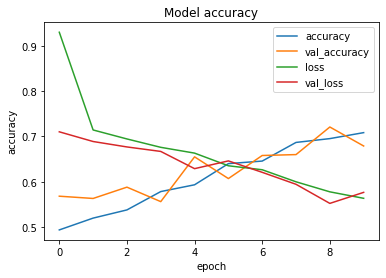

In [33]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.plot(loss)
plt.plot(val_loss)

plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"])
print(history.history.keys())
plt.show

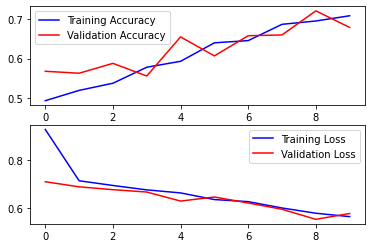

In [36]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[0].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['loss'], color='b', label="Training Loss")
ax[1].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[1].legend(loc='best')

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7137 - loss: 0.5699


In [38]:
test_acc

0.7074999809265137

In [39]:
test_loss

0.5683730840682983

In [40]:
y_predicted = model.predict(x_test)
y_expected = np.argmax(y_test, axis = 1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [41]:
predicted_classes = np.argmax(y_predicted, axis = 1) 

In [42]:
cmat = tf.math.confusion_matrix(y_expected, predicted_classes) 

<Axes: >

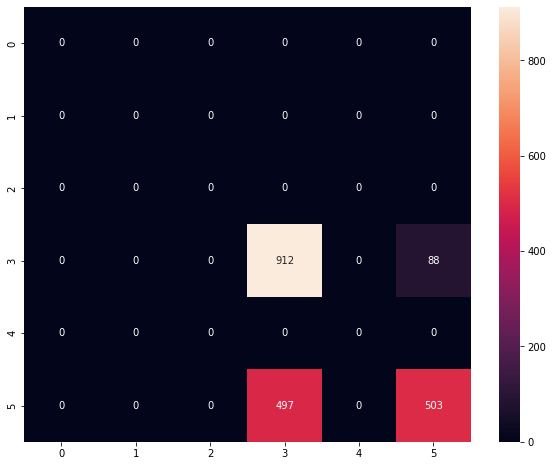

In [43]:
# Cats 3
# Dogs 5
# X = PREDICTED
# Y = EXPECTED
plt.figure(figsize=(10, 8))
sns.heatmap(cmat, annot=True, fmt='g')

IndexError: index 35448 is out of bounds for axis 0 with size 10000